In [1]:
import numpy as np 
import pandas as pd
from pylab import plt, mpl


In [2]:
def f(x):
    return 2*x**2-(x**3/3)


In [3]:
x = np.linspace(-2,4,25);
y= f(x);

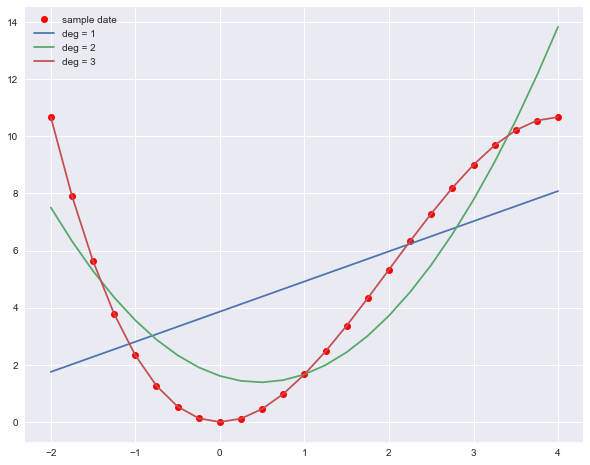

In [5]:
# the usual fit of multiple polynomials

plt.style.use('seaborn')
plt.figure(figsize = (10,8))
plt.plot(x,y,'ro',label = 'sample date')
for deg in [1,2,3]:
    reg = np.polyfit(x,y,deg = deg);
    y_  = np.polyval(reg,x);
    MSE = ((y-y_)**2).mean();
    plt.plot(x,y_,label=f'deg = {deg}')
plt.legend()

In [6]:
# estimation with neural networks 
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=3 * [256],
                              learning_rate_init=0.03,
                              max_iter=5000);

# max_iter refers to number of iterations until tolerance



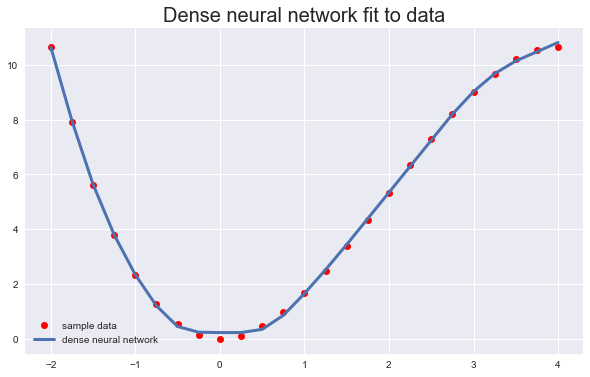

In [7]:
z = x.reshape(-1,1) # coverts array into a tuple
model.fit(z,y)  # MLP requires data x to be an array 
#z.shape()
y_ = model.predict(z);
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro',label = 'sample data')
plt.plot(x,y_,lw = 3.0,label = 'dense neural network')
plt.title('Dense neural network fit to data',fontsize = 20)
plt.legend()


In [9]:
import tensorflow
#tf.random.set_seed(100)

round = 1 || mse = 2.679
round = 2 || mse = 0.649
round = 3 || mse = 0.199
round = 4 || mse = 0.109
round = 5 || mse = 0.087


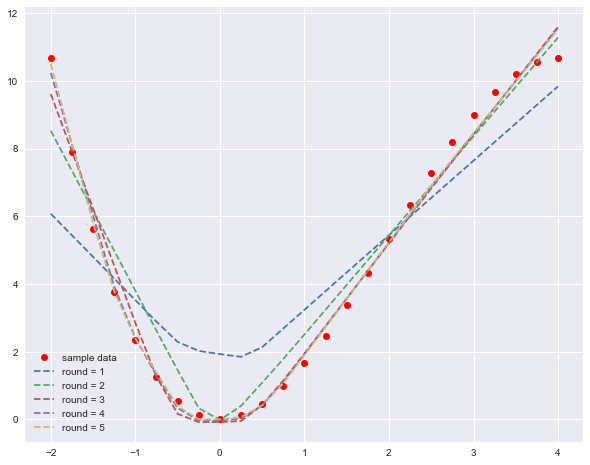

In [17]:
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(256,activation = 'relu',input_dim = 1)) # adding a rectilinear unit for activation 
model.add(Dense(1,activation = 'linear'))
model.compile(loss = 'mse',optimizer = 'rmsprop')
plt.figure(figsize = (10,8))
plt.plot(x,y,'ro',label = 'sample data')
for _ in range(1,6):
    model.fit(x,y,epochs = 100,verbose = False) # every loop the model is trained with 100 epochs 
    y_ = model.predict(x)
    mse = ((y-y_.flatten())**2).mean()  # flatten function used to make 2D array into 1D array by flattening
    print(f'round = {_} || mse = {mse:.3f}')
    plt.plot(x,y_,'--',label = f'round = {_}')
plt.legend()


In [16]:
np.shape(y_.flatten())

(25,)

range(1, 6)

range(0, 3)